## ME7: Neural Networks

We will have serveral exercises of neural networks using Sklearn neural network multi-layer perceptron (MLP) packages. Although keras with tensorflow framework is more commonly used in ML, this will be a good start to know how NN can be used for classification and regression problems. Keras/tensorflow will be explored in the next assignment. 

Please read the document on Scikit Learn:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Write your name and your collaborators if any. 

- Han Duong
- Veronica Carpenter

### Set up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "NN"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Utility functions

In [2]:
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()
    

### Activation functions

- You should explore these activation functions to find the best function for your dataset(s). 

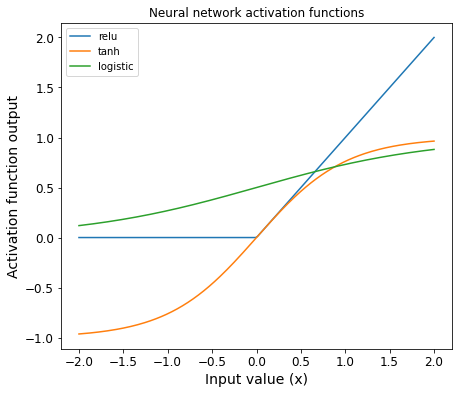

In [3]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

plt.show()

## Part 0

- The examples in Part 0 build classifiers and regressors using neural networks. 

- We will use synthetic datasets to demonstrate the NN modeling process.

- Classifier examples demonstrate the model performance through the class boundary with model score (overall accuracy). 


### Neural networks on Classification
- Read and run each cell of the given examples and understand the results

- Tasks: you might have warnings related to data normalization or/and number of iterations. 
    - <span style="color:red"> Fix the issues and remove warnings (if possible).  </span>
     

#### SkLearn Neural networks for classification
- Please also read the document on Scikit Learn   
    - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


### (1) Synthetic dataset1: Binary classification

- A synthetic dataset contains two features (x1 and x2)
- We use single hidden layer NN. 

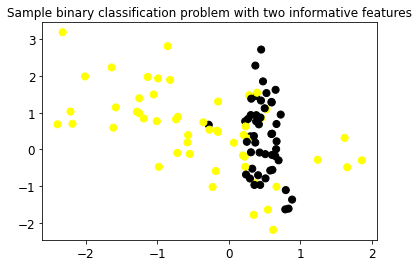

In [4]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o', c=y_C2, s=50, cmap=cmap_bold)
plt.show()

#### NN modeling on synthetic dataset 1

- We may need to increase the number of iterations or scale the data (normalization).

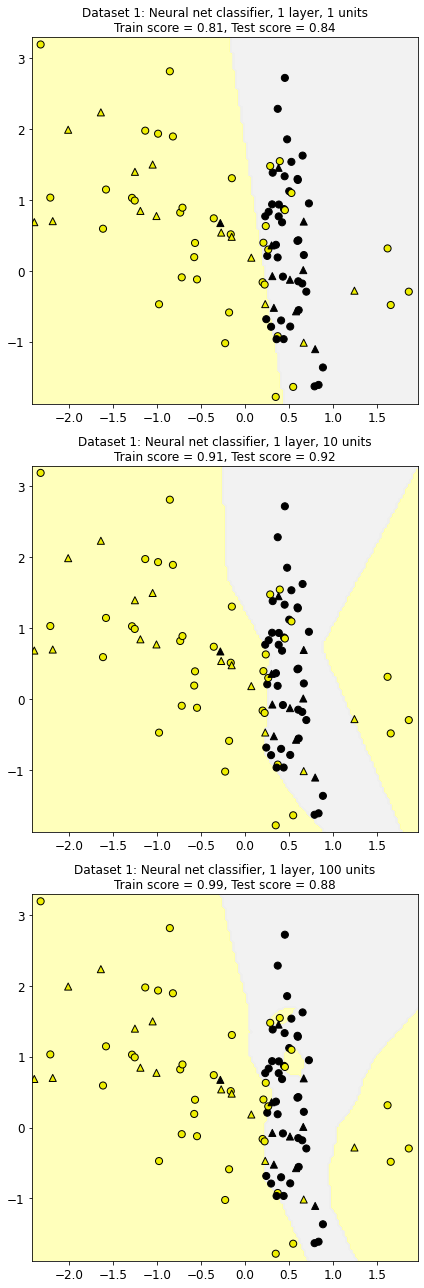

In [5]:
from sklearn.neural_network import MLPClassifier

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

# [1,10,100] are units
for units, axis in zip([1, 10, 100], subaxes):
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### (2) Synthetic dataset 2: binary classification

- More difficult synthetic dataset for classification (binary) with classes that are not linearly separable.
- We apply single hidden layer NN.

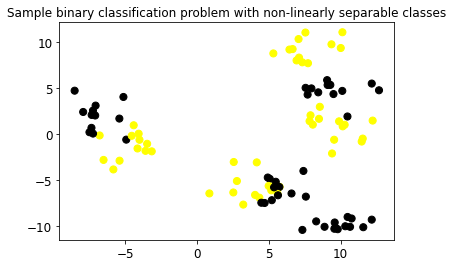

In [6]:
# generate a synthetic dataset
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

#### NN modeling on synthetic dataset 2

- We may need to increase the number of iterations or scale the data (normalization).

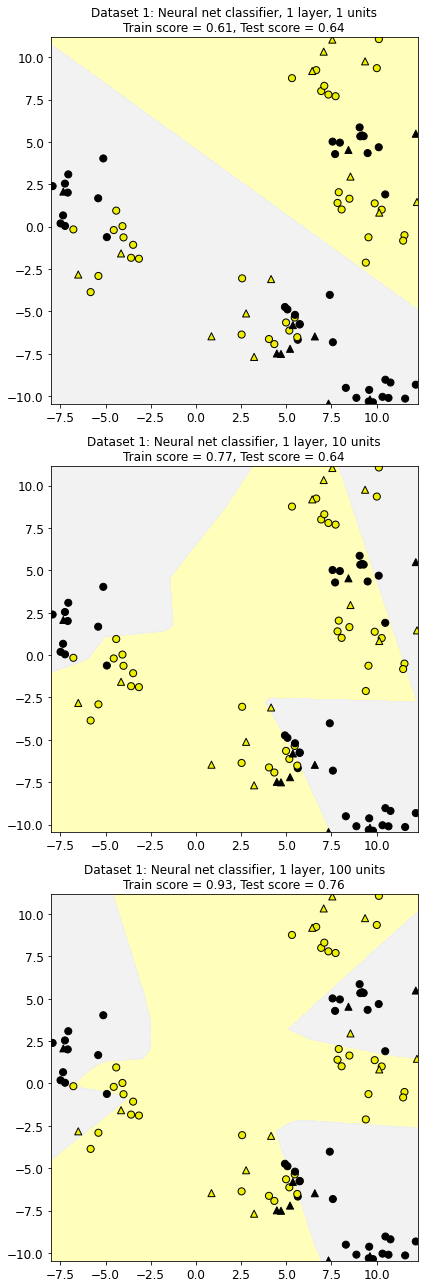

In [7]:
from sklearn.neural_network import MLPClassifier

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)


for units, axis in zip([1, 10, 100], subaxes):
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf = MLPClassifier(hidden_layer_sizes = [units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

#### Apply two hidden layer NN on synthetic dataset 2

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


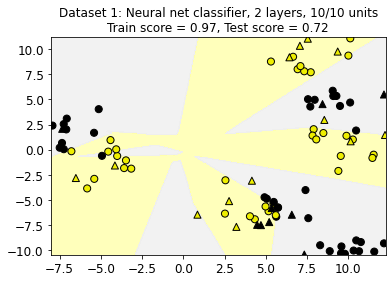

In [8]:
#from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# model training with two hidden layers
nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

#### NN on synthetic dataset 2: Regularization parameter: alpha

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

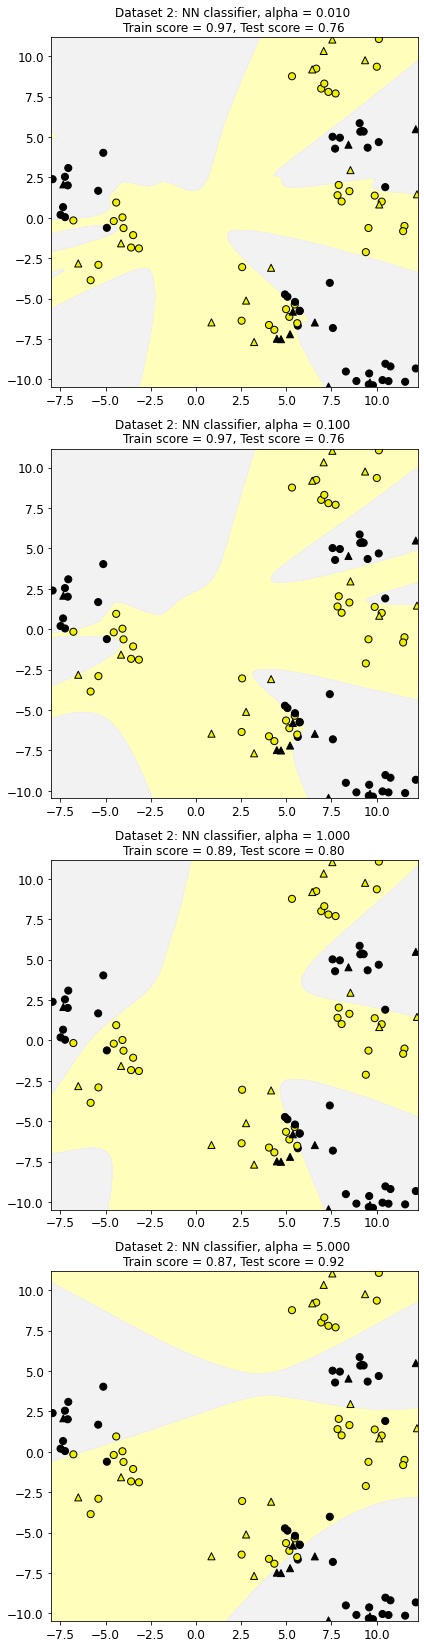

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(4, 1, figsize=(6, 23))

for this_alpha, axis in zip([0.01, 0.1, 1.0, 5.0], subaxes):
    nnclf = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()
    

#### NN on synthetic dataset2: the effect of different choices of activation function

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


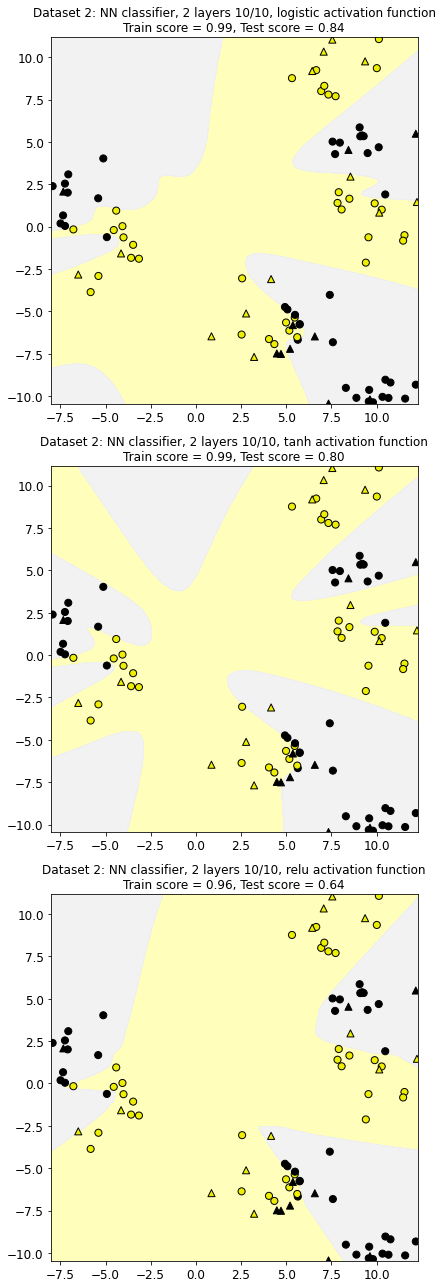

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

fig, subaxes = plt.subplots(3, 1, figsize=(6,18))

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf = MLPClassifier(max_iter = 500, solver='lbfgs', activation = this_activation,
                         alpha = 0.01, hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

### Neural networks on Regression

- NN can be also applied for regression problems.

#### sklearn Neural Networks for regression

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

#### A synthetic dataset with one feature

- A simple example that can be visualized the regression. 

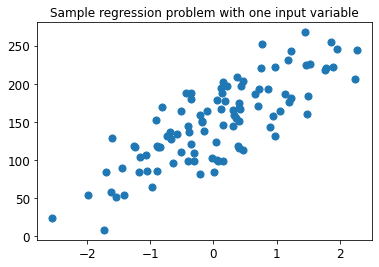

In [11]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression

plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

##### A NN regressor modeling

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

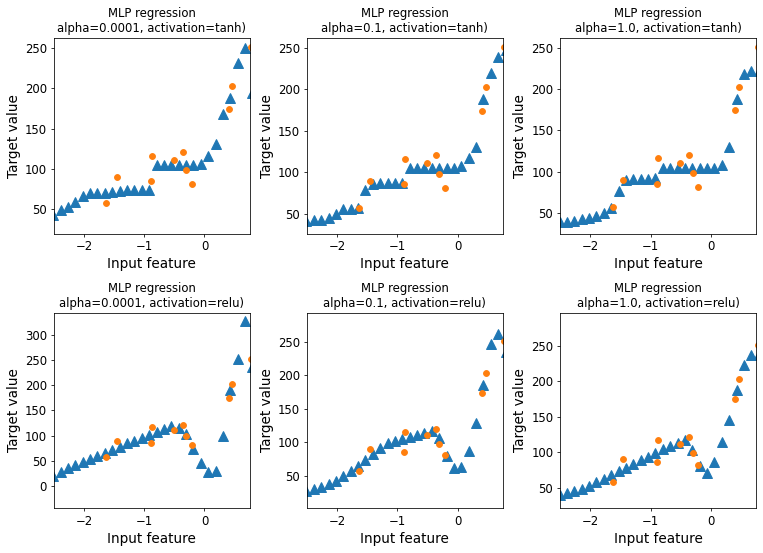

In [12]:
from sklearn.neural_network import MLPRegressor
# 2 rows & 3 plots
fig, subaxes = plt.subplots(2, 3, figsize=(11,8), dpi=70)

X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu', 'logistic']):
    for thisalpha, thisaxis in zip([0.0001, 0.1, 1.0, 100], thisaxisrow):
        # create a model
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([-2.5, 0.75])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()

## Part 1

### NN Application to real-world dataset for classification

- You will be working on two datasets: (1) Breast cancer dataset, and (2) fruit dataset

- Before you start NN modeling, prepare the datasets (a) a dataset without normalization, (b) a dataset with normalization. 

- Please make sure that training data and test data must be the same scale. This means that the normalization process should be done before you split the data into training data and test data.  

- For each dataset, conduct classificaton modeling and evalute the model performance. We would suggest you use evaluation metrics for classification (accuracy, precision, recall, f1-score, etc.)

    - 1. Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) for each layer.
       - You may want to use different number of units for the two hidden layers. 

    - 2. Find out the optimal alpha parameter value for regularization.
        - alpha = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]

    - 3. Apply three different activation functions and show the effect.
        - activation = ['tanh', relu', 'logistic']
        
    - 4. (extra) Build a NN model with 3 hidden layers and check if the model is improvled. 

- Compare the results without normalization and with normalization. 


### 1. Breast Cancer dataset

In [13]:
# Breast cancer dataset for classification
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(X_cancer.shape) # 30 attributes

(569, 30)


#### Add cells for your modeling below.

#### Let's first choose the first two attributes and display the data

- This is simply for visualization purpose. You can include most (or all) attributes for X. 

In [14]:
# You should choose some attributes for X
# You also should check X's shpae and y_cancer's shape
# We show how to do below as an example,
# but you should be able to do this process on your own. 

X = X_cancer[:, :2] 
print(X.shape)
print(y_cancer.shape)

(569, 2)
(569,)


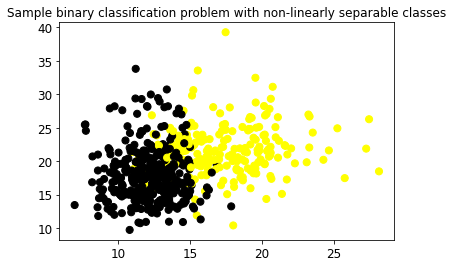

In [15]:
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X[:,0], X[:,1], c=y_cancer,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on non-normalized data

- We are using all 30 attribues of X
- X is not normalized. 

In [26]:
X = X_cancer[:, :30] 
print(X.shape)
print(y_cancer.shape)

(569, 30)
(569,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cancer, random_state=0)

for units in [10, 20, 50, 100]:
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf = MLPClassifier(hidden_layer_sizes = [units,units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf.score(X_train, y_train)
    test_score  = nnclf.score(X_test, y_test)
    
    print("Units: " + str(units))
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Units: 10
train_score: 0.9389671361502347
test_score: 0.9230769230769231



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Units: 20
train_score: 0.9483568075117371
test_score: 0.9440559440559441

Units: 50
train_score: 0.6267605633802817
test_score: 0.6293706293706294

Units: 100
train_score: 0.9530516431924883
test_score: 0.958041958041958



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Data normalization

- We are using all 30 attribues of X
- Please keep in mind that we do not normalize y values (it is class label!)

In [19]:
# normalize x
from sklearn import preprocessing
normalized_data = preprocessing.normalize(X,norm='l1')
print(normalized_data.shape)

(569, 30)


#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on normalized data

- We are using all 30 attribues of X
- X is normalized. 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y_cancer, random_state=0)

for units in [10, 20, 50, 100]:
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf1 = MLPClassifier(hidden_layer_sizes = [units,units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    title = 'Cancer Data set: Neural net classifier, 2 layers, {} units'.format(units)
    
    train_score = nnclf1.score(X_train, y_train)
    test_score  = nnclf1.score(X_test, y_test)
    
    print("Units: " + str(units))
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")

Units: 10
train_score: 0.6267605633802817
test_score: 0.6293706293706294



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Units: 20
train_score: 0.9225352112676056
test_score: 0.9300699300699301



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Units: 50
train_score: 0.9295774647887324
test_score: 0.9370629370629371

Units: 100
train_score: 0.931924882629108
test_score: 0.9230769230769231



#### Find the optimal alpha parameter value for regularization

In [46]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y_cancer, random_state=0)

for this_alpha in [0.01, 0.1, 1.0, 5.0]:
    nnclf2 = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf2.score(X_train, y_train)
    test_score  = nnclf2.score(X_test, y_test)
    
    print("alpha: " + str(this_alpha))
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.01
train_score: 0.9436619718309859
test_score: 0.9370629370629371



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.1
train_score: 0.9413145539906104
test_score: 0.9300699300699301

alpha: 1.0
train_score: 0.9131455399061033
test_score: 0.9300699300699301

alpha: 5.0
train_score: 0.6267605633802817
test_score: 0.6293706293706294



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.01 will be the most optimal alpha because it give use high train_score and test_score that are closest to each other

#### Apply different activation functions (logistic, tanh, relu) and show the effect. 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y_cancer, random_state=0)

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf3 = MLPClassifier(max_iter = 500, solver='lbfgs', activation = this_activation,
                         alpha = 0.01, hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf3.score(X_train, y_train)
    test_score  = nnclf3.score(X_test, y_test)
    
    print("activation: " + this_activation)
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


activation: logistic
train_score: 0.9389671361502347
test_score: 0.9370629370629371



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


activation: tanh
train_score: 0.9530516431924883
test_score: 0.9440559440559441

activation: relu
train_score: 0.9507042253521126
test_score: 0.951048951048951



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### (2) Fruit dataset

- We show how to read txt format files using Pandas read_csv() function. 
- Make sure you check shape of X and shape of y

In [49]:
# fruits dataset
fruits = pd.read_csv('./data/fruit_data_with_colors.txt', sep='\t', engine='python')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']

X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']


print(X_fruits_2d.shape)
print(y_fruits_2d.shape)


(59, 2)
(59,)


#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on not normalized data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

for units in [10, 20, 50, 100]:
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf = MLPClassifier(hidden_layer_sizes = [units,units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf.score(X_train, y_train)
    test_score  = nnclf.score(X_test, y_test)
    
    print("Units: " + str(units))
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

Units: 10
train_score: 0.8409090909090909
test_score: 0.6

Units: 20
train_score: 0.8636363636363636
test_score: 0.6666666666666666



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Units: 50
train_score: 0.8863636363636364
test_score: 0.8

Units: 100
train_score: 0.8863636363636364
test_score: 0.8



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Apply varying regularization parameter alpha on non-normalized data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

for this_alpha in [0.01, 0.1, 1.0, 5.0]:
    nnclf2 = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf2.score(X_train, y_train)
    test_score  = nnclf2.score(X_test, y_test)
    
    print("alpha: " + str(this_alpha))
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.01
train_score: 0.8863636363636364
test_score: 0.6



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.1
train_score: 0.8863636363636364
test_score: 0.8



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 1.0
train_score: 0.8181818181818182
test_score: 0.6

alpha: 5.0
train_score: 0.6590909090909091
test_score: 0.4



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Apply three different activation functions on non-normalized data¶

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf3 = MLPClassifier(max_iter = 500, solver='lbfgs', activation = this_activation,
                         alpha = 0.01, hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf3.score(X_train, y_train)
    test_score  = nnclf3.score(X_test, y_test)
    
    print("activation: " + this_activation)
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


activation: logistic
train_score: 0.8636363636363636
test_score: 0.7333333333333333



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


activation: tanh
train_score: 0.8863636363636364
test_score: 0.7333333333333333

activation: relu
train_score: 0.8636363636363636
test_score: 0.9333333333333333



### Normalize data

In [53]:
# normalize x
from sklearn import preprocessing
normalized_fruit_data = preprocessing.normalize(X_fruits,norm='l1')
print(normalized_fruit_data.shape)

(59, 4)


#### Apply neural network with 2 hidden layers with varying number of units (e.g., 10, 20, 50, 100) on normalized data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(normalized_fruit_data, y_fruits, random_state=0)

for units in [10, 20, 50, 100]:
    # create a model and training it
    # we may need to increase the number of iterations or scale the data (normalization)
    nnclf = MLPClassifier(hidden_layer_sizes = [units,units], solver='lbfgs',
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf.score(X_train, y_train)
    test_score  = nnclf.score(X_test, y_test)
    
    print("Units: " + str(units))
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

Units: 10
train_score: 0.7727272727272727
test_score: 0.3333333333333333

Units: 20
train_score: 0.8863636363636364
test_score: 0.6666666666666666

Units: 50
train_score: 0.8863636363636364
test_score: 0.7333333333333333

Units: 100
train_score: 0.8863636363636364
test_score: 0.8



#### Find the optimal alpha parameter value for regularization

In [55]:
X_train, X_test, y_train, y_test = train_test_split(normalized_fruit_data, y_fruits, random_state=0)

for this_alpha in [0.01, 0.1, 1.0, 5.0]:
    nnclf2 = MLPClassifier(solver='lbfgs', activation = 'tanh',
                         alpha = this_alpha,
                         hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf2.score(X_train, y_train)
    test_score  = nnclf2.score(X_test, y_test)
    
    print("alpha: " + str(this_alpha))
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


alpha: 0.01
train_score: 0.8863636363636364
test_score: 0.5333333333333333

alpha: 0.1
train_score: 0.8181818181818182
test_score: 0.5333333333333333

alpha: 1.0
train_score: 0.3409090909090909
test_score: 0.26666666666666666

alpha: 5.0
train_score: 0.3409090909090909
test_score: 0.26666666666666666



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


#### Apply different activation functions (logistic, tanh, relu) and show the effect. 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(normalized_fruit_data, y_fruits, random_state=0)

for this_activation, axis in zip(['logistic', 'tanh', 'relu'], subaxes):
    nnclf3 = MLPClassifier(max_iter = 500, solver='lbfgs', activation = this_activation,
                         alpha = 0.01, hidden_layer_sizes = [100, 100],
                         random_state = 0).fit(X_train, y_train)
    
    train_score = nnclf3.score(X_train, y_train)
    test_score  = nnclf3.score(X_test, y_test)
    
    print("activation: " + this_activation)
    
    print("train_score: " + str(train_score))
    print("test_score: " + str(test_score) + "\n")
    

activation: logistic
train_score: 0.3409090909090909
test_score: 0.26666666666666666



C:\Users\dinhh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


activation: tanh
train_score: 0.8863636363636364
test_score: 0.8666666666666667

activation: relu
train_score: 0.8863636363636364
test_score: 0.8666666666666667



## Part 2

- Write a short summary of your analysis result of neural networks (submitted on Canvas). 

- Provide a link to the notebook on Github.

From the result received the more units we use for the model, the better training and test score we get. From the observation 100 units give us the best training score of train_score: 0.931924882629108 and test score of 0.9230769230769231 for normalized the breast cancer data set and the best training score of 0.8863636363636364 and testing score of 0.8 for the normalized fruits data set. From the activation functions relu, tanh, and logistic, the logistic activation function give the best traing score and testing score on both of the breast cancer data set. The training score of the normalized breast cancer data set when using relu activation function is 0.9507042253521126 and the testing score is 0.951048951048951. The training score of the normalized fruits data set 0.8863636363636364 and testing score is 0.8666666666666667 when using relu activation function.